#### One Input and Multiple outpus using Functional API

In [33]:
import tensorflow
from tensorflow import keras
from keras.models import Model
from keras.layers import Dense, Input, concatenate, Flatten
from keras.utils import plot_model

In [ ]:
x=Input(shape=(3,))

In [ ]:
h1=Dense(units=64, activation='relu')(x)
h2=Dense(units=64, activation='relu')(h1)
h3=Dense(units=64, activation='relu')(h2)

output1=Dense(1, activation='linear')(h3)
output2=Dense(1, activation='sigmoid')(h3)
output3=Dense(10, activation='softmax')(h3)

model=Model(inputs=x, outputs=[output1, output2, output3])
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 3)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_21 (Dense)          │ (None, 64)             │            256 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_22 (Dense)          │ (None, 64)             │          4,160 │ dense_21[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_23 (Dense)          │ (None, 64)             │          4,160 │ dense_22[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_24 (Dense)          │ (None, 1)              │             65 │ dense_23[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_25 (Dense)          │ (None, 1)              │             65 │ dense_23[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_26 (Dense)          │ (None, 10)             │            650 │ dense_23[0][0]         │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 9,356 (36.55 KB)

 Trainable params: 9,356 (36.55 KB)

 Non-trainable params: 0 (0.00 B)

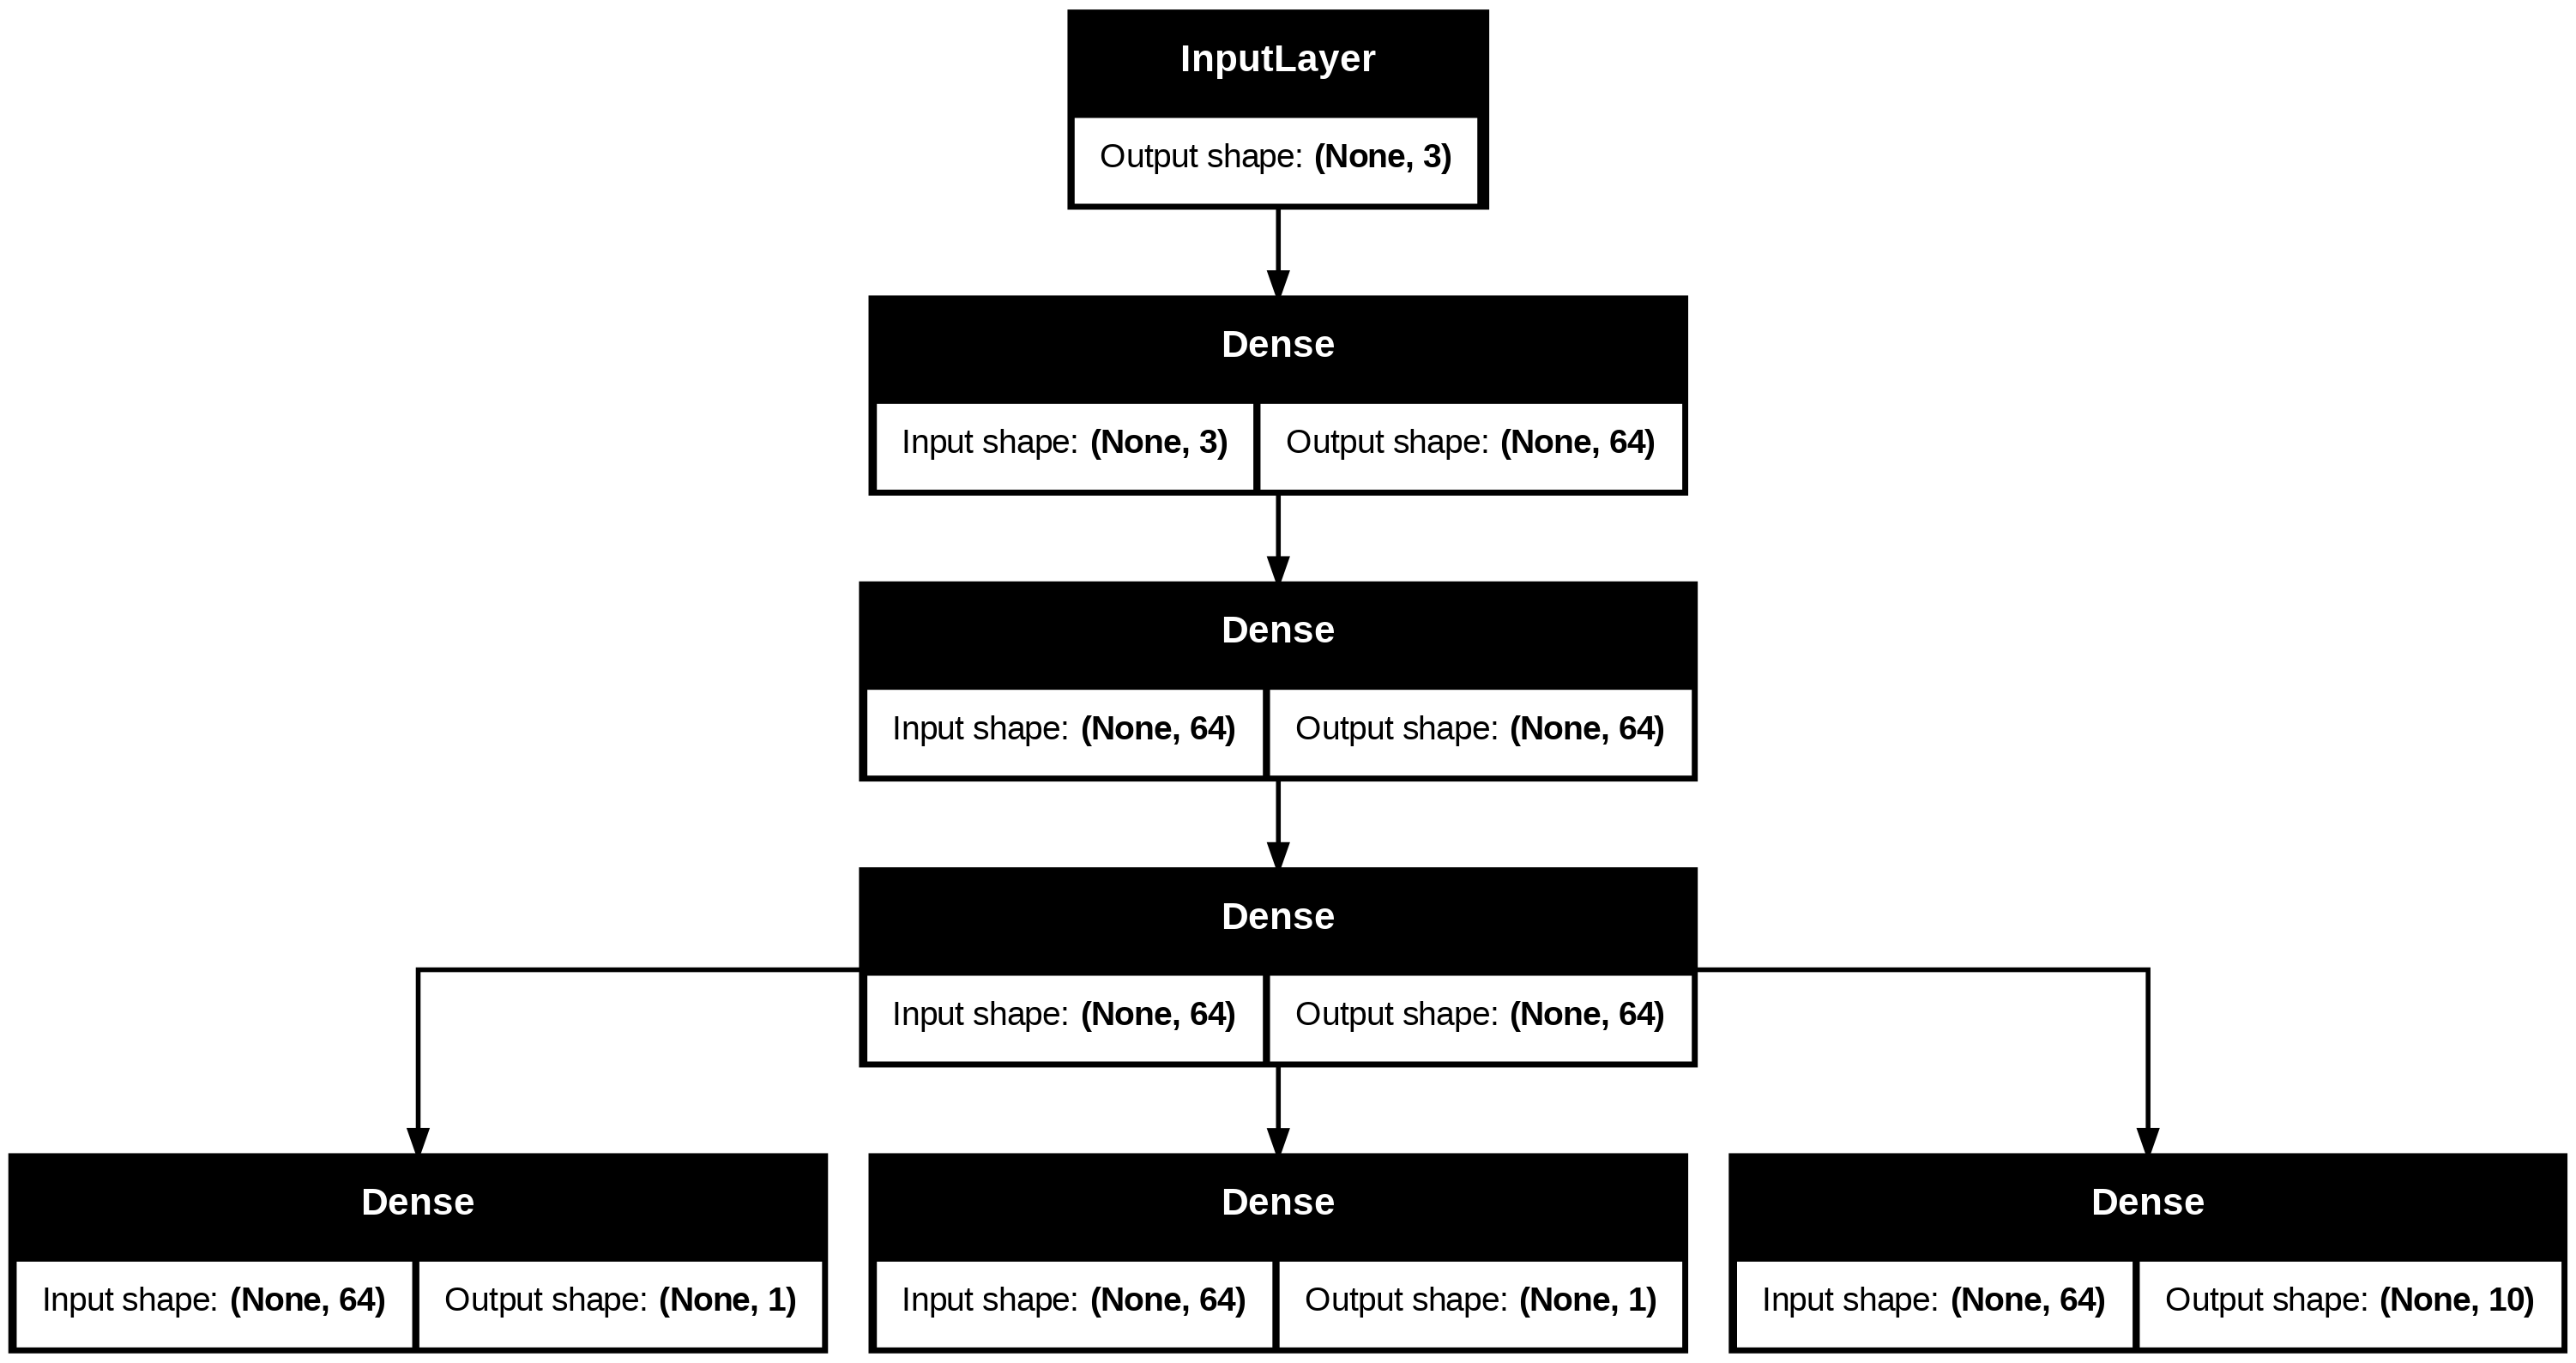

In [ ]:
plot_model(model, show_shapes=True)

### Multiple Input and Multiple output using Functional API

In [ ]:
input1=Input(shape=(32,))
input2=Input(shape=(64,))
input3=Input(shape=(128,))

In [ ]:
h11=Dense(64, activation='relu')(input1)
h12=Dense(32, activation='relu')(h11)
h13=Dense(128, activation='relu')(h12)

h21=Dense(64, activation='relu')(input2)
h22=Dense(32, activation='relu')(h21)

h31=Dense(128, activation='relu')(input3)
h32=Dense(128, activation='relu')(h31)
h33=Dense(64, activation='relu')(h32)
h34=Dense(32, activation='relu')(h33)

In [ ]:
combined=concatenate([h13,h22,h34])

In [ ]:
h4=Dense(32, activation='relu')(combined)
output1=Dense(1, activation='linear')(h4)

In [ ]:
model=Model(inputs=[input1, input2, input3], outputs=output1)
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6             │ (None, 128)            │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_4             │ (None, 32)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_56 (Dense)          │ (None, 128)            │         16,512 │ input_layer_6[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_51 (Dense)          │ (None, 64)             │          2,112 │ input_layer_4[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_5             │ (None, 64)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_57 (Dense)          │ (None, 128)            │         16,512 │ dense_56[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_52 (Dense)          │ (None, 32)             │          2,080 │ dense_51[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_54 (Dense)          │ (None, 64)             │          4,160 │ input_layer_5[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_58 (Dense)          │ (None, 64)             │          8,256 │ dense_57[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_53 (Dense)          │ (None, 128)            │          4,224 │ dense_52[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_55 (Dense)          │ (None, 32)             │          2,080 │ dense_54[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_59 (Dense)          │ (None, 32)             │          2,080 │ dense_58[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_2             │ (None, 192)            │              0 │ dense_53[0][0],        │
│ (Concatenate)             │                        │                │ dense_55[0][0],        │
│                           │                        │                │ dense_59[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_60 (Dense)          │ (None, 32)             │          6,176 │ concatenate_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_61 (Dense)          │ (None, 1)              │             33 │ dense_60[0][0]         │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 64,225 (250.88 KB)

 Trainable params: 64,225 (250.88 KB)

 Non-trainable params: 0 (0.00 B)

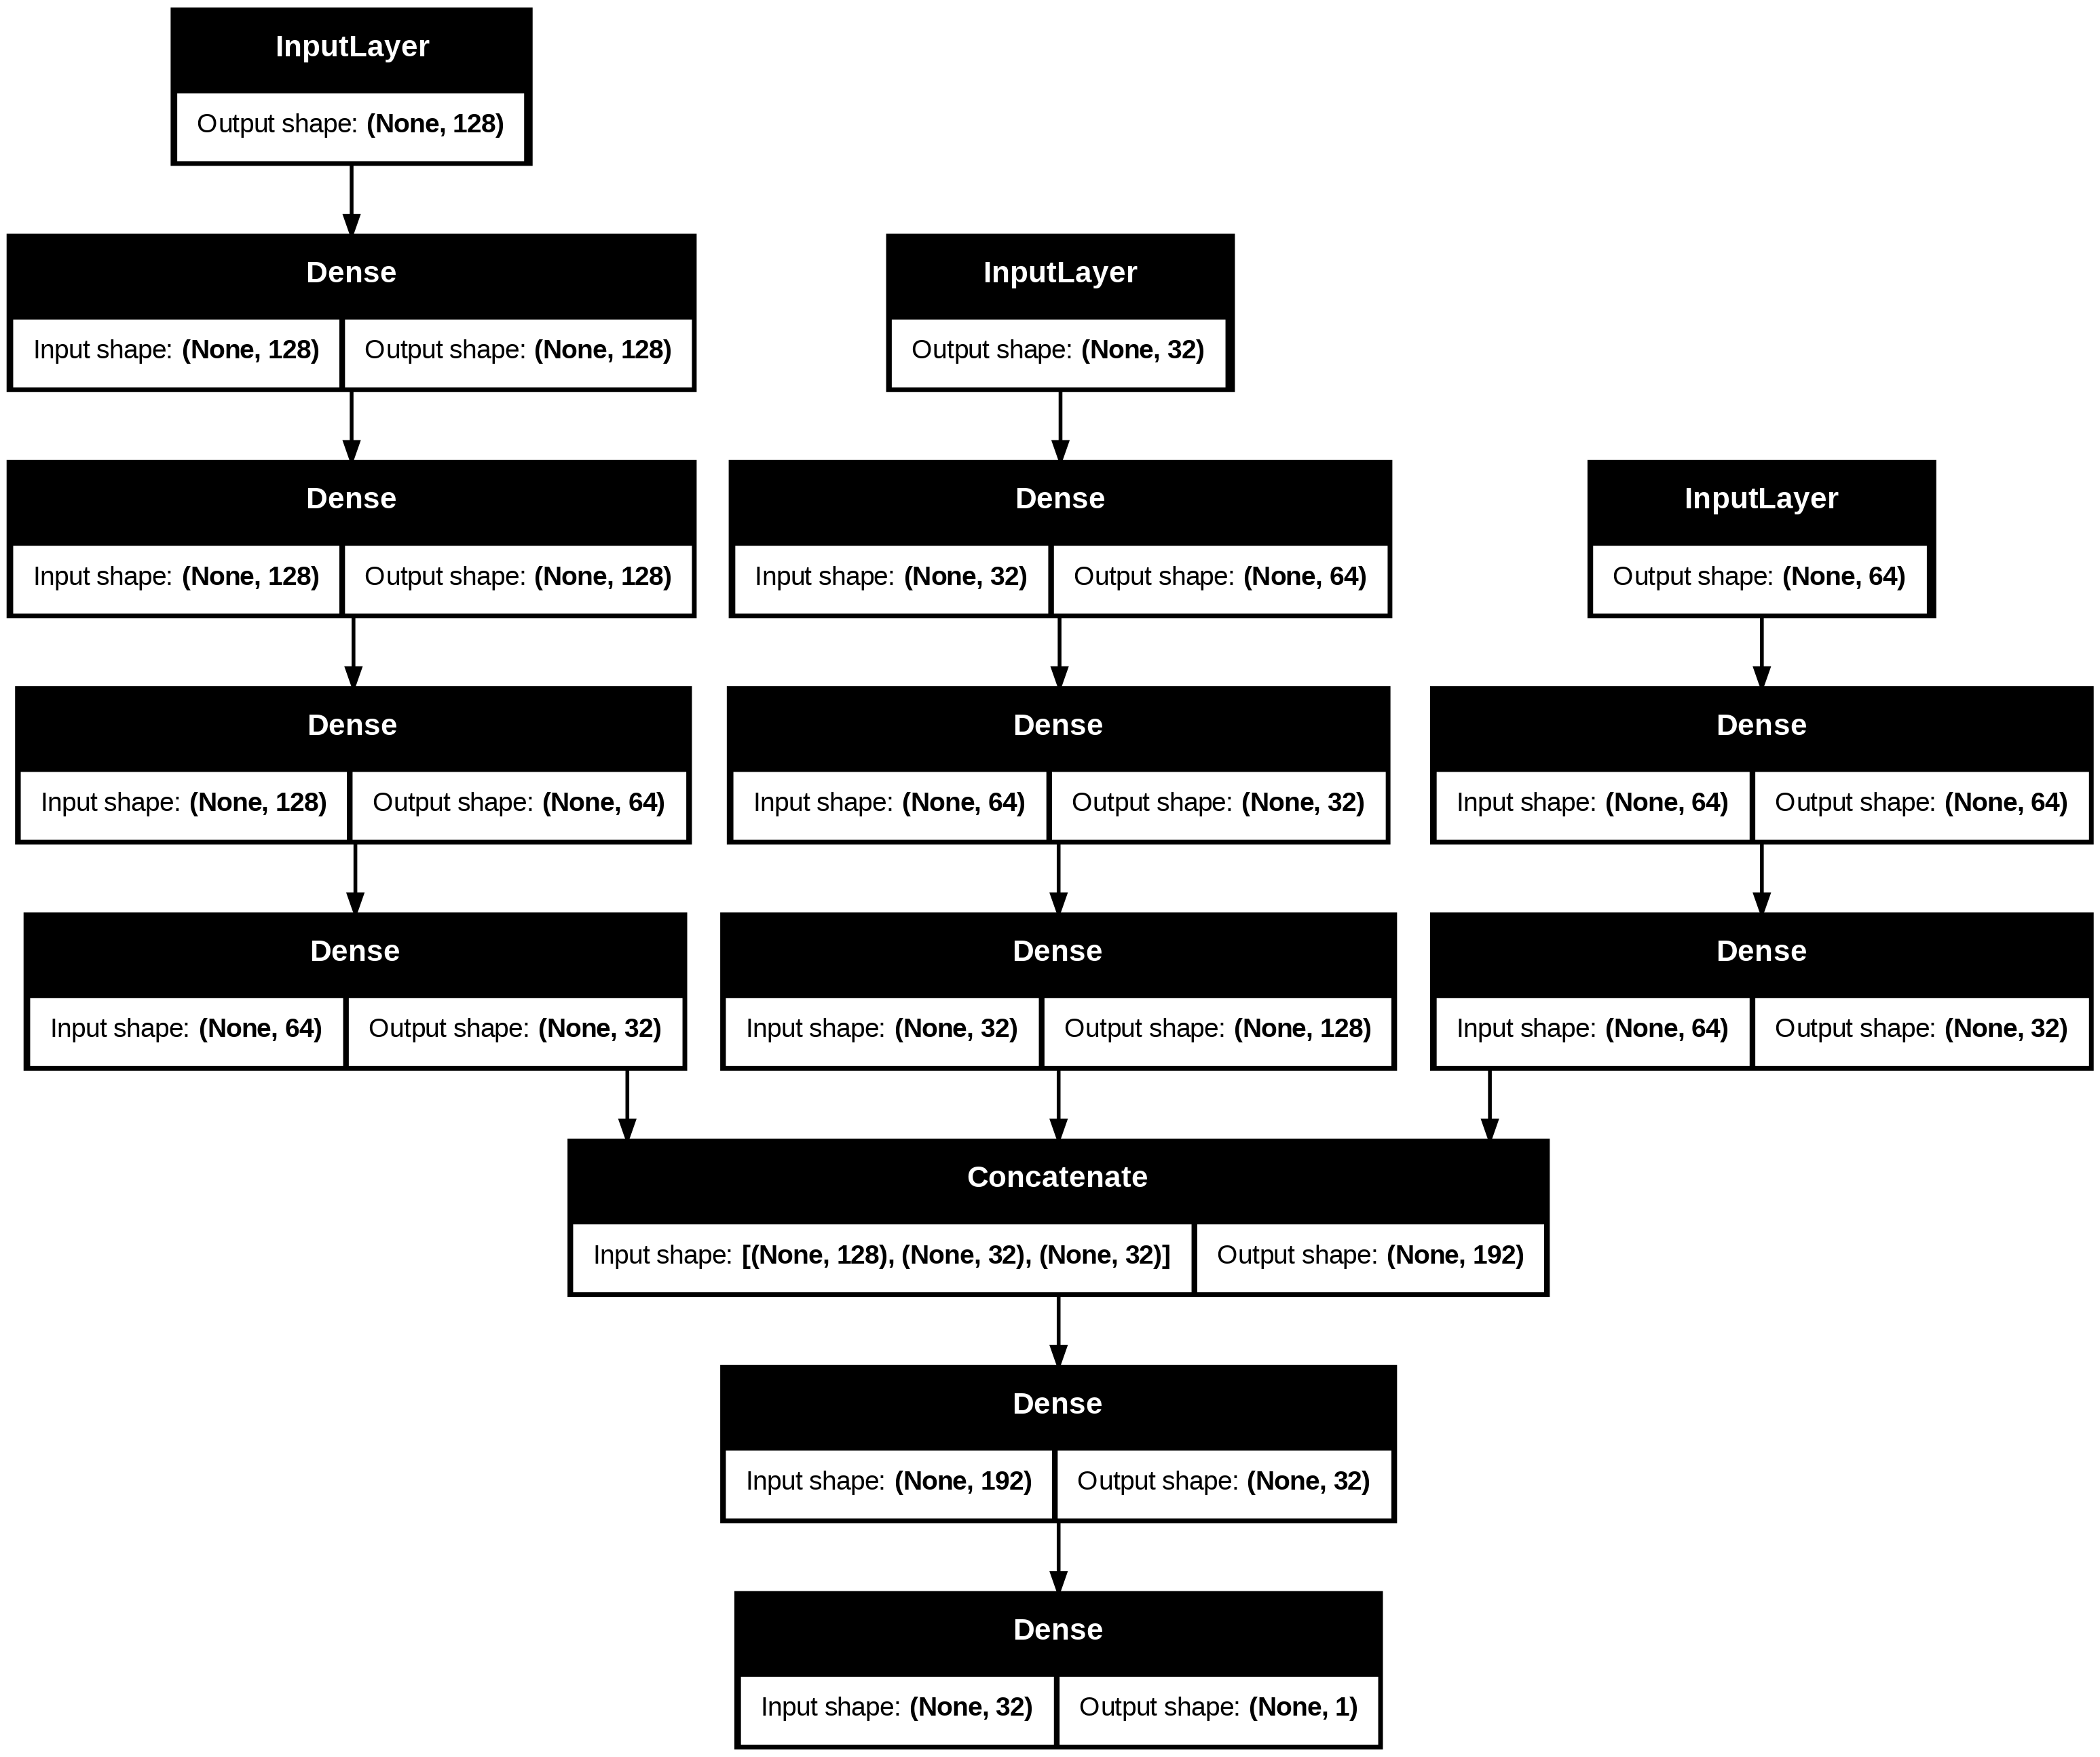

In [ ]:
plot_model(model, show_shapes=True)

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
!kaggle datasets download -d jangedoo/utkface-new

Dataset URL: https://www.kaggle.com/datasets/jangedoo/utkface-new
License(s): copyright-authors
 97% 321M/331M [00:03<00:00, 102MB/s] 
100% 331M/331M [00:03<00:00, 101MB/s]


In [4]:
import zipfile
zip=zipfile.ZipFile('/content/utkface-new.zip')
zip.extractall('/content')
zip.close()

In [5]:
import os
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
folder_path='/content/utkface_aligned_cropped/UTKFace'
folder_path

'/content/utkface_aligned_cropped/UTKFace'

### Predict Gender (Binary Class), Age (Regression), Ethnicity (Multi-class)

In [7]:
ethnicity=[]

for file in os.listdir(folder_path):
  ethnicity.append(file.split("_")[2])

In [8]:
ethnicity_count=[]
for i in ethnicity:
  if i not in ethnicity_count:
    ethnicity_count.append(i)

print(ethnicity_count)

['0', '1', '3', '2', '4', '20170109142408075.jpg.chip.jpg', '20170109150557335.jpg.chip.jpg', '20170116174525125.jpg.chip.jpg']


In [9]:
age=[]
gender=[]
ethnicity=[]
img_path=[]

for file in os.listdir(folder_path):
  if file.split("_")[2] in ['0','1','2','3','4']:
    age.append(file.split('_')[0])
    gender.append(file.split("_")[1])
    ethnicity.append(file.split("_")[2])
    img_path.append(file)

In [10]:
ethnicity_count=[]
for i in ethnicity:
  if i not in ethnicity_count:
    ethnicity_count.append(i)

print(ethnicity_count)

['0', '1', '3', '2', '4']


In [11]:
print(len(img_path))

23705


In [12]:
df=pd.DataFrame({'age':age, 'gender':gender, 'ethnicity': ethnicity, 'image_path':img_path})
df.head()

,age,gender,ethnicity,image_path
0,23,1,0,23_1_0_20170117145031171.jpg.chip.jpg
1,35,0,0,35_0_0_20170117134936879.jpg.chip.jpg
2,90,1,0,90_1_0_20170110180120743.jpg.chip.jpg
3,43,1,0,43_1_0_20170103183515393.jpg.chip.jpg
4,45,1,0,45_1_0_20170109135632551.jpg.chip.jpg


In [13]:
df.shape

(23705, 4)

In [14]:
train_df=df.sample(frac=1, random_state=0)[:20000]
val_df=df.sample(frac=1, random_state=0)[20000:]

In [15]:
print(train_df.shape)
print(val_df.shape)

(20000, 4)
(3705, 4)


In [27]:
train_datagen=ImageDataGenerator(rescale=1./255, rotation_range=25, width_shift_range=0.2,
                                 height_shift_range=0.2, zoom_range=0.2,
                                 horizontal_flip=True)

val_datagen=ImageDataGenerator(rescale=1./255, rotation_range=25, width_shift_range=0.2,
                                 height_shift_range=0.2, zoom_range=0.2,
                                 horizontal_flip=True)

In [31]:
train_generator=train_datagen.flow_from_dataframe(train_df, directory=folder_path,
                                                  x_col='image_path', y_col=['age', 'gender', 'ethnicity'],
                                                  target_size=(256,256),
                                                  class_mode='multi_output')

val_generator=val_datagen.flow_from_dataframe(val_df, directory=folder_path,
                                                  x_col='image_path', y_col=['age', 'gender', 'ethnicity'],
                                                  target_size=(256,256),
                                                  class_mode='multi_output')

Found 20000 validated image filenames.
Found 3705 validated image filenames.


In [18]:
train_generator.dtype

'float32'

In [19]:
from keras.applications.resnet50 import ResNet50

In [20]:
resnet=ResNet50(include_top=False, input_shape=(256,256,3))

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [34]:
resnet.trainable=False

print(resnet.layers[-1])

output_0=resnet.layers[-1].output

flatten=Flatten()(output_0)

dense11=Dense(units=128, activation='relu')(flatten)
dense12=Dense(units=64, activation='relu')(dense11)
output1=Dense(units=1, activation='linear', name='age')(dense12)

dense21=Dense(units=128, activation='relu')(flatten)
dense22=Dense(units=64, activation='relu')(dense21)
output2=Dense(units=1, activation='sigmoid', name='gender')(dense22)

dense31=Dense(units=128, activation='relu')(flatten)
dense32=Dense(units=64, activation='relu')(dense31)
output3=Dense(units=5, activation='softmax', name='ethnicity')(dense32)

<Activation name=conv5_block3_out, built=True>


In [35]:
model=Model(inputs=resnet.input, outputs=[output1, output2, output3])
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 256, 256, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 262, 262, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 128, 128, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 128, 128, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 128, 128, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 130, 130, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 64, 64, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 64, 64, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 64, 64, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 64, 64, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 64, 64, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 64, 64, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 64, 64, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 64, 64, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 64, 64, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 73,944,967 (282.08 MB)

 Trainable params: 50,357,255 (192.10 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [36]:
model.compile(optimizer='adam', loss={'age': 'mae', 'gender': 'binary_crossentropy', 'ethnicity': 'categorical_crossentropy'},
              metrics={'age': 'mae', 'gender': 'accuracy', 'ethnicity': 'accuracy'},
              loss_weights={'age': 10, 'gender':45, 'ethnicity': 45})

In [39]:
hist=model.fit(train_generator,validation_data=val_generator, epochs=3, batch_size=32)

ValueError: Invalid dtype: str96